In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

Selecting all the columns which are of type float and int

In [3]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
Box plot can be used to find the outliers.



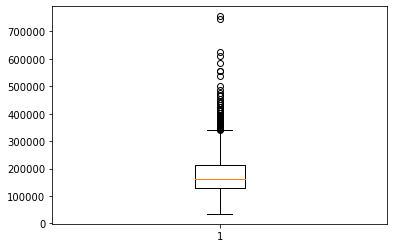

In [4]:
plt.boxplot(df['SalePrice'])
plt.show()

In [10]:
outliers = []

def detect_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    
    print('q1',q1, 'q3',q3)
    
    IQR = q3-q1
    print()
    print('IQR',IQR)
    print()
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    print('lower_bound', lower_bound, 'upper_bound', upper_bound)
    print()
    
    for i in data:
        if(i<lower_bound or i>upper_bound):
            outliers.append(i)
    return outliers

outlier = detect_outliers(df['SalePrice'])
print(outlier)
print() 
print('Length of outliers',len(outliers))

q1 129975.0 q3 214000.0

IQR 84025.0

lower_bound 3937.5 upper_bound 340037.5

[341000, 342643, 345000, 345000, 348000, 350000, 350000, 354000, 359100, 360000, 361919, 367294, 369900, 370878, 372402, 372500, 374000, 375000, 377426, 377500, 378500, 380000, 381000, 383970, 385000, 385000, 386250, 392000, 392500, 394432, 394617, 395000, 395192, 402000, 402861, 403000, 410000, 412500, 415298, 423000, 424870, 426000, 430000, 437154, 438780, 440000, 446261, 451950, 465000, 466500, 475000, 485000, 501837, 538000, 555000, 556581, 582933, 611657, 625000, 745000, 755000]

Length of outliers 61


In [13]:
outliers = []
outlier_less = []

def detect_outliers(data):
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    
    
    print()
    print('q1',q1, 'q3',q3)
    print()
    
    IQR = q3-q1
    print()
    print('IQR',IQR)
    print()
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    print()
    print('lower_bound', lower_bound, 'upper_bound', upper_bound)
    print()
    
    for i in data:
        if(i<lower_bound or i>upper_bound):
            outliers.append(i)
        else:
            outlier_less.append(i)
    return outlier_less# Driver code

print()
print(df['SalePrice'])
print()

outliers_less_data = detect_outliers(df['SalePrice'])

print()
print("After removing outliers from IQR method: ", outliers_less_data)




0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


q1 129975.0 q3 214000.0


IQR 84025.0


lower_bound 3937.5 upper_bound 340037.5


After removing outliers from IQR method:  [34900, 35311, 37900, 39300, 40000, 52000, 52500, 55000, 55000, 55993, 58500, 60000, 60000, 60000, 61000, 62383, 64500, 66500, 67000, 67000, 68400, 68500, 72500, 73000, 75000, 75500, 76000, 76500, 78000, 79000, 79000, 79000, 79500, 79900, 79900, 80000, 80000, 80000, 80000, 80500, 81000, 81000, 81000, 82000, 82000, 82000, 82500, 82500, 82500, 83000, 83000, 83500, 84000, 84500, 84500, 84500, 84900, 85000, 85000, 85000, 85000, 85400, 85500, 86000, 86000, 86000, 87000, 87000, 87000, 87000, 87500, 88000, 88000, 88000, 88000, 89000, 89471, 89500, 89500, 90000, 90000, 90000, 90350, 91000, 91000, 91000, 91300, 91500, 91500, 92000, 92900, 93000, 93000, 93000, 93500